In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Data preprocessing

In [2]:
dataset = pd.read_csv("student_score.csv")
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [3]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
dataset.astype(float)


,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
dataset.isnull().any()

Hours     False
Scores    False
dtype: bool

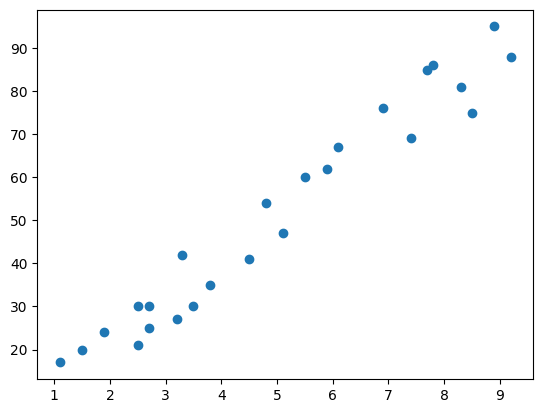

In [8]:
plt.scatter(x,y)

### Train and Test the model


In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(x,y , test_size=0.2 , random_state=0)


In [10]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Test set prediction

In [11]:
y_test_pred=model.predict(X_test)


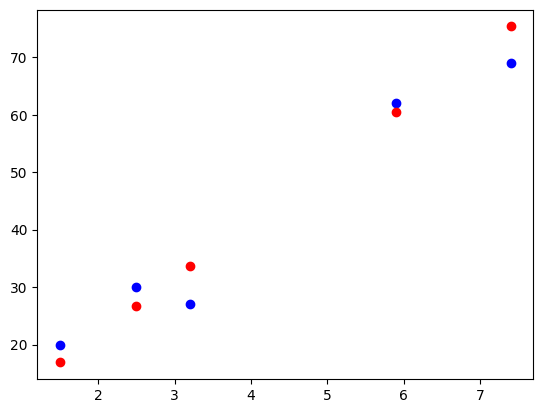

In [12]:
plt.scatter(X_test,y_test,color='blue')
plt.scatter(X_test,y_test_pred,color='red')

### visualize the training set results

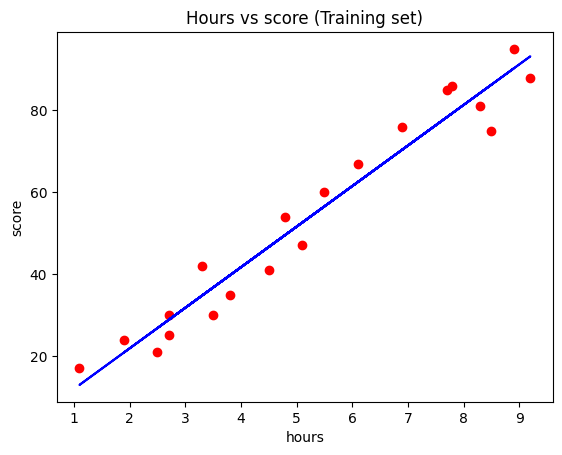

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs score (Training set)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### visulaize the test set results

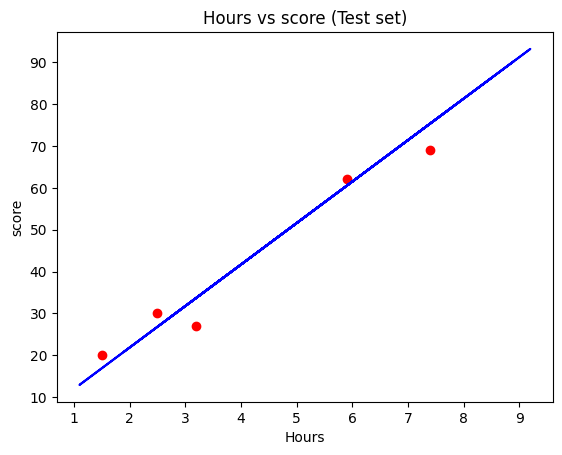

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs score (Test set)')
plt.xlabel('Hours')
plt.ylabel('score')
plt.show()

##### what will be the score of the student that studies 9.25 hours/day?

In [24]:
hours=np.array(9.25).reshape(-1,1)
predicted=model.predict(hours)
print("hours :" ,hours[0][0])
print("predicted score :" , predicted[0])


hours : 9.25
predicted score : 93.69173248737535


c:\Users\mosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### model Evaluation



In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [16]:
print('R2 = ', r2_score(y_test, y_test_pred))
print('MAE = ', mean_absolute_error(y_test, y_test_pred))  ## a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account
print('MRSE = ', mean_squared_error(y_test, y_test_pred))  ## measures how close a regression line is to a set of data points

R2 =  0.9454906892105355
MAE =  4.183859899002975
MRSE =  21.598769307217406
